<a href="https://colab.research.google.com/github/DigitalGoldRush/Project-2-Emotional-recognition/blob/main/emotion_recognition_model_test_final_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from tensorflow import keras
from keras import layers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
RANDOM_SEED = 123


In [3]:
#Faster way to upload zip files from gdrive to colab
# ID of Kaggle emotional dataset
! gdown --id 1wrwLq6DqNHLDxU18RYUPY0WcV4ZNG70P

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wrwLq6DqNHLDxU18RYUPY0WcV4ZNG70P
To: /content/emotional dataset.zip
100% 62.6M/62.6M [00:01<00:00, 48.3MB/s]


In [4]:
# zip file opener
!pip install patool
import patoolib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.4 MB/s 


In [5]:
patoolib.extract_archive('/content/emotional dataset.zip')

patool: Extracting /content/emotional dataset.zip ...
patool: running /usr/bin/7z x -o./Unpack_b5bz0iug -- "/content/emotional dataset.zip"
patool: ... /content/emotional dataset.zip extracted to `emotional dataset' (multiple files in root).


'emotional dataset'

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

### Data Preparation

In [7]:
# data preparation
train_dir = '/content/emotional dataset/Training/Training'
test_dir = '/content/emotional dataset/Testing/Testing'

train_angry_dir = '/content/emotional dataset/Training/Training/Angry'
train_fear_dir = '/content/emotional dataset/Training/Training/Fear'
train_happy_dir = '/content/emotional dataset/Training/Training/Happy'
train_neutral_dir = '/content/emotional dataset/Training/Training/Neutral'
train_sad_dir = '/content/emotional dataset/Training/Training/Sad'
train_surprise_dir = '/content/emotional dataset/Training/Training/Suprise'

test_angry_dir = '/content/emotional dataset/Testing/Testing/Angry'
test_fear_dir = '/content/emotional dataset/Testing/Testing/Fear'
test_happy_dir = '/content/emotional dataset/Testing/Testing/Happy'
test_neural_dir = '/content/emotional dataset/Testing/Testing/Neutral'
test_sad_dir = '/content/emotional dataset/Testing/Testing/Sad'
test_surprise_dir = '/content/emotional dataset/Testing/Testing/Suprise'

dir_list = [train_angry_dir, train_fear_dir, train_happy_dir,
           train_neutral_dir, train_sad_dir, train_surprise_dir,
           test_angry_dir, test_fear_dir, test_happy_dir,
           test_neural_dir, test_sad_dir, test_surprise_dir]

for d in dir_list:
    print(d, len(os.listdir(d)))


/content/emotional dataset/Training/Training/Angry 3995
/content/emotional dataset/Training/Training/Fear 4097
/content/emotional dataset/Training/Training/Happy 7215
/content/emotional dataset/Training/Training/Neutral 4965
/content/emotional dataset/Training/Training/Sad 4830
/content/emotional dataset/Training/Training/Suprise 3171
/content/emotional dataset/Testing/Testing/Angry 958
/content/emotional dataset/Testing/Testing/Fear 1024
/content/emotional dataset/Testing/Testing/Happy 1774
/content/emotional dataset/Testing/Testing/Neutral 1233
/content/emotional dataset/Testing/Testing/Sad 1247
/content/emotional dataset/Testing/Testing/Suprise 831


In [8]:
# image generator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=64,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=62,
                                                             class_mode='categorical')

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [9]:
# callback function
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

### Models

#### model = RMS optimizer, Relu Activation

In [15]:
# build the model = RMS Optimizer, Relu Activation

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(6, activation='softmax')  
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 64)      

In [16]:
# Fit the model
history = model.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 171s 354ms/step - loss: 1.7501 - accuracy: 0.2561 - val_loss: 1.6950 - val_accuracy: 0.2783
Epoch 2/5
442/442 [==============================] - 145s 328ms/step - loss: 1.6975 - accuracy: 0.2828 - val_loss: 1.6010 - val_accuracy: 0.3458
Epoch 3/5
442/442 [==============================] - 147s 332ms/step - loss: 1.6373 - accuracy: 0.3242 - val_loss: 1.5480 - val_accuracy: 0.3833
Epoch 4/5
442/442 [==============================] - 146s 330ms/step - loss: 1.5769 - accuracy: 0.3578 - val_loss: 1.4539 - val_accuracy: 0.4190
Epoch 5/5
442/442 [==============================] - 146s 330ms/step - loss: 1.5255 - accuracy: 0.3817 - val_loss: 1.3761 - val_accuracy: 0.4551


In [17]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model Loss: {test_loss}, Model Accuracy: {test_acc}")


114/114 - 5s - loss: 1.3761 - accuracy: 0.4551 - 5s/epoch - 42ms/step
Model Loss: 1.3760792016983032, Model Accuracy: 0.45507287979125977


##### Accuracy/Plot Graph

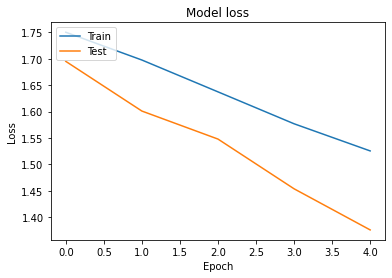

In [18]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

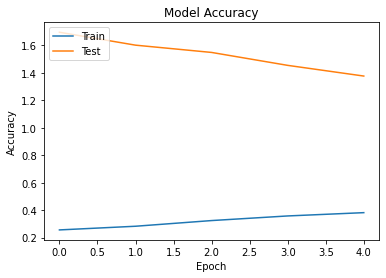

In [19]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_adam = ADAM optimizer, Relu **Activation** 

In [20]:
# Build model_adam = ADAM optimizer, Relu Activation function

model_adam = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

# Compile the model
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_adam.summary()


    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
# Fit the model 
history = model.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 153s 347ms/step - loss: 1.4804 - accuracy: 0.4032 - val_loss: 1.3193 - val_accuracy: 0.4852
Epoch 2/5
442/442 [==============================] - 146s 331ms/step - loss: 1.4379 - accuracy: 0.4268 - val_loss: 1.2795 - val_accuracy: 0.4968
Epoch 3/5
323/442 [====================>.........] - ETA: 38s - loss: 1.4037 - accuracy: 0.4413

In [ ]:
# Evaluate the model_adam loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model_adam.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model_Adam Loss: {test_loss}, Model_Adam Accuracy: {test_acc}")


##### Accuracy/Plot Graph

In [ ]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_swish = RMS Optimizer, Swish **Activation** 


In [ ]:
# Build model_swish = RMS Optimizer, Swish Activation

model_swish = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='swish', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='swish'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# compile the model_swish
model_swish.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy']) 
model_swish.summary()


In [26]:
# Fit the model 
history = model.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 141s 320ms/step - loss: 1.3436 - accuracy: 0.4674 - val_loss: 1.2366 - val_accuracy: 0.5223
Epoch 2/5
442/442 [==============================] - 141s 320ms/step - loss: 1.3248 - accuracy: 0.4777 - val_loss: 1.1945 - val_accuracy: 0.5376
Epoch 3/5
442/442 [==============================] - 143s 324ms/step - loss: 1.3159 - accuracy: 0.4797 - val_loss: 1.1867 - val_accuracy: 0.5422
Epoch 4/5
442/442 [==============================] - 144s 325ms/step - loss: 1.3008 - accuracy: 0.4910 - val_loss: 1.2142 - val_accuracy: 0.5299
Epoch 5/5
442/442 [==============================] - 144s 326ms/step - loss: 1.2885 - accuracy: 0.4933 - val_loss: 1.1855 - val_accuracy: 0.5316


In [27]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

# Display the model's loss and accuracy results
print(f"Model_swish Loss: {test_loss}, Model_swish Accuracy: {test_acc}")


114/114 - 4s - loss: 1.1855 - accuracy: 0.5316 - 4s/epoch - 37ms/step
Model_swish Loss: 1.1854557991027832, Model_swish Accuracy: 0.5316258668899536


##### Accuracy/Plot Graph

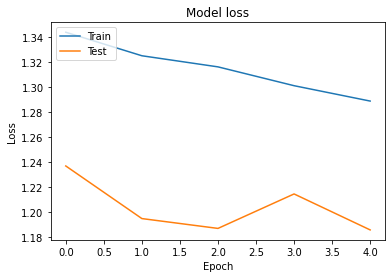

In [28]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

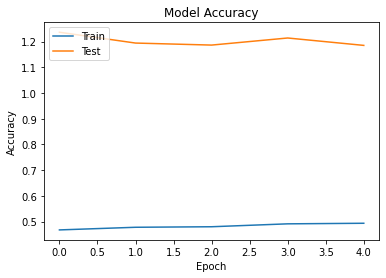

In [29]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_adam_swish = ADAM optimizer, Swish Activation

In [30]:
# Build model_adam_swish = ADAM Optimizer, Swish Activation

model_adam_swish = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='swish', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='swish'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_adam_swish.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
model_adam_swish.summary()
# keras.utils.plot_model(model_adam_swish)



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 64)      

In [31]:
# Fit the model 
history = model.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)


Epoch 1/5
442/442 [==============================] - 144s 325ms/step - loss: 1.2756 - accuracy: 0.4972 - val_loss: 1.1857 - val_accuracy: 0.5411
Epoch 2/5
442/442 [==============================] - 144s 325ms/step - loss: 1.2734 - accuracy: 0.5013 - val_loss: 1.1771 - val_accuracy: 0.5350
Epoch 3/5
442/442 [==============================] - 145s 327ms/step - loss: 1.2704 - accuracy: 0.5023 - val_loss: 1.1804 - val_accuracy: 0.5405
Epoch 4/5
442/442 [==============================] - 144s 326ms/step - loss: 1.2661 - accuracy: 0.5097 - val_loss: 1.1779 - val_accuracy: 0.5496
Epoch 5/5
442/442 [==============================] - 143s 323ms/step - loss: 1.2564 - accuracy: 0.5062 - val_loss: 1.1515 - val_accuracy: 0.5538


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

print(f"Model_adam_swish Loss: {test_loss}, Model_adam_swish Accuracy: {test_acc}")



##### model_adam_swish saved

In [34]:
# save the model to g-drive because files are discarded on colab after a period of time
# change the name each time or it will be overwritten
model.save('adam_swish.h5')

#model.save("/content/drive/MyDrive/Colab Notebooks/Project 2_ Emotion Recognition/facial_reco_whole_model_V3")
# change the file name!!

##### Accuracy/Plot Graph

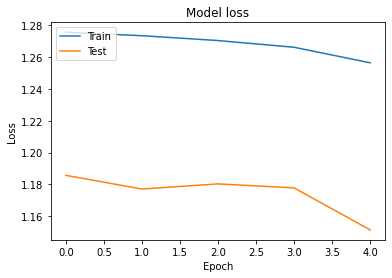

In [35]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

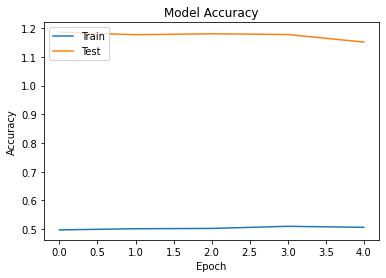

In [36]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

#### model_cnn = Convolutional Neural Network

In [37]:
# Set the CNN model_CNN 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

import tensorflow as tf

model_CNN = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape = (150,150,3)),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape = (150,150,3)),
tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape = (150,150,3)),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation = "swish"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model_CNN
model_CNN.compile(optimizer= RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
                  loss = "categorical_crossentropy",
                  metrics=["accuracy"])

model_CNN.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 16)        2320      
                                                                 
 conv2d_34 (Conv2D)          (None, 70, 70, 16)        2320      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 35, 35, 16)       0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Fit the model 
history = model.fit(train_generator,
                   epochs=5,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)

Epoch 1/5
442/442 [==============================] - 152s 344ms/step - loss: 1.2260 - accuracy: 0.5248 - val_loss: 1.1500 - val_accuracy: 0.5571
Epoch 2/5
442/442 [==============================] - 140s 316ms/step - loss: 1.2295 - accuracy: 0.5235 - val_loss: 1.1630 - val_accuracy: 0.5476
Epoch 3/5
442/442 [==============================] - 141s 318ms/step - loss: 1.2274 - accuracy: 0.5250 - val_loss: 1.1500 - val_accuracy: 0.5592
Epoch 4/5
442/442 [==============================] - 140s 316ms/step - loss: 1.2281 - accuracy: 0.5226 - val_loss: 1.1761 - val_accuracy: 0.5421
Epoch 5/5
442/442 [==============================] - 139s 315ms/step - loss: 1.2288 - accuracy: 0.5199 - val_loss: 1.1758 - val_accuracy: 0.5465


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate_generator method and the test generator
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

print(f"Model_cnn Loss: {test_loss}, Model_cnn Accuracy: {test_acc}")

114/114 - 4s - loss: 1.1758 - accuracy: 0.5465 - 4s/epoch - 39ms/step
Model_cnn Loss: 1.1758086681365967, Model_cnn Accuracy: 0.5464836359024048


##### Accuracy/Plot Graph

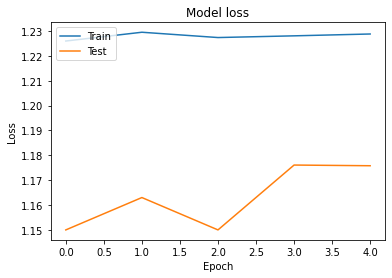

In [ ]:
# Plot the loss function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

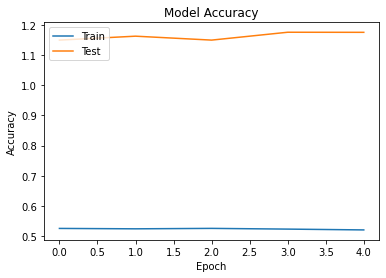

In [ ]:
# Plot the accuracy function for the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],
            loc='upper left')
plt.show()

### Confusion Matrix

Confusion Matrix
[[   0  306    0  652    0    0]
 [   0  349    0  675    0    0]
 [   0  593    0 1181    0    0]
 [   0  424    0  809    0    0]
 [   0  390    0  857    0    0]
 [   1  262    1  567    0    0]]


Text(69.0, 0.5, 'Truth')

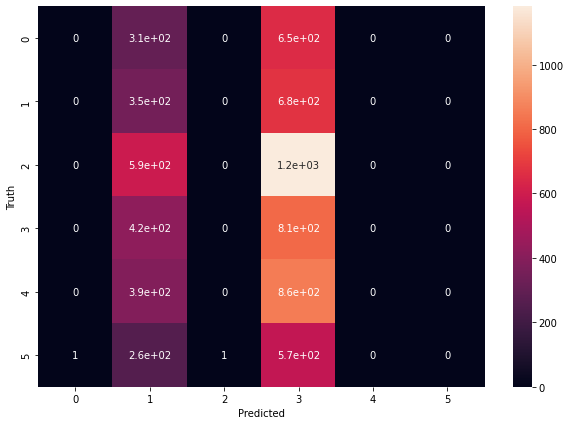

In [ ]:
# Confusion Matrix
# model_adam

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_adam.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 

Confusion Matrix
[[102  70 261 159 252 114]
 [ 88  98 296 188 246 108]
 [175 139 529 311 454 166]
 [112 100 334 208 356 123]
 [117 114 344 232 328 112]
 [ 69  67 232 151 239  73]]


Text(69.0, 0.5, 'Truth')

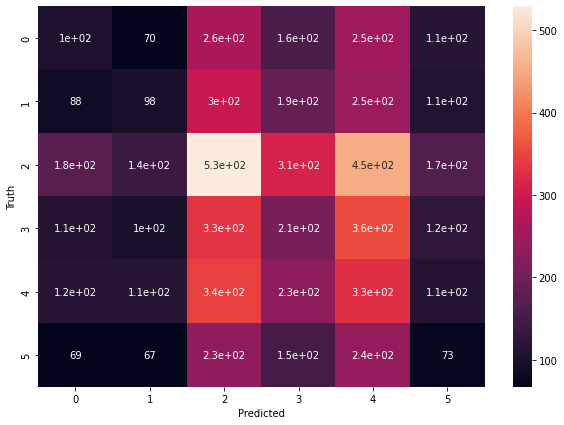

In [ ]:
# Confusion Matrix
# model
from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 


Confusion Matrix
[[  14   29  615   97  164   39]
 [  16   28  645  124  171   40]
 [  21   50 1151  182  304   66]
 [   9   34  815  127  200   48]
 [  18   39  799  141  198   52]
 [  17   31  512   94  138   39]]


Text(69.0, 0.5, 'Truth')

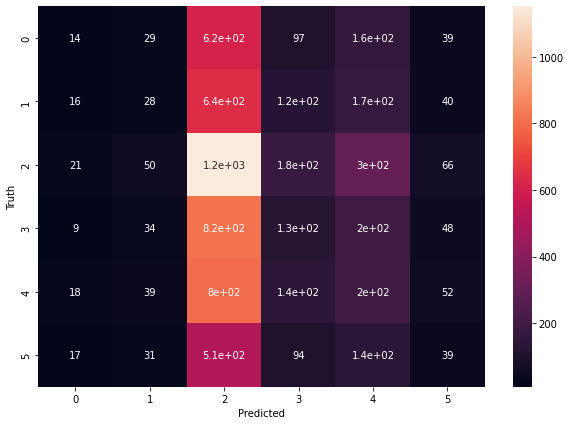

In [ ]:
# Confusion Matrix
# model_swish

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_swish.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 


Confusion Matrix
[[   0    0  554  395    8    1]
 [   0    0  587  428    8    1]
 [   1    0 1030  723   18    2]
 [   0    0  696  524   11    2]
 [   0    0  723  515    7    2]
 [   0    1  468  356    5    1]]


Text(69.0, 0.5, 'Truth')

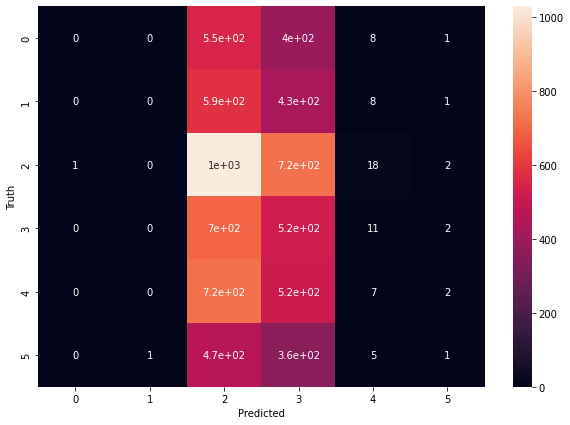

In [ ]:
# Confusion Matrix
# model_adam_swish

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_adam_swish.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
 

Confusion Matrix
[[ 859    3    0    0   10   25   38   23    0]
 [ 912    7    0    0    8   24   48   24    1]
 [1587    2    0    1   17   48   65   52    2]
 [1119    8    1    0   16   20   38   29    2]
 [1138    3    0    0   15   27   39   24    1]
 [ 753    5    0    0    8   23   18   24    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]]


Text(69.0, 0.5, 'Truth')

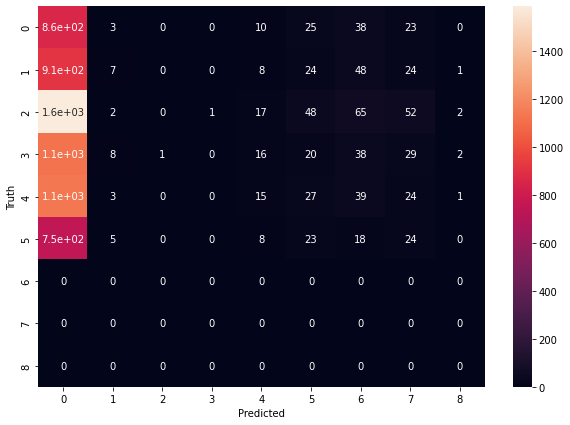

In [ ]:
# Confusion Matrix
# model_cnn

from sklearn.metrics import confusion_matrix
import seaborn as sns
    
y_pred = model_CNN.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')